# Python Excercise :  Simple Linear Regression

In [1]:
#Library

import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt

## __Tips Dataset__

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## __EDA__

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [3]:
df = tips[['total_bill', 'tip']]
df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [4]:
df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [5]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


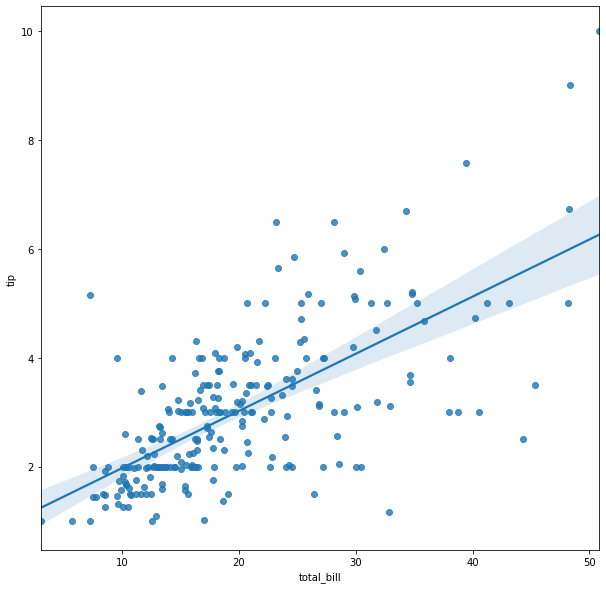

In [6]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'total_bill', y = 'tip', data=df)
plt.show()

## __OLS__

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

# OLS()
### sm_lm = status model linear model 

In [7]:
sm_lm = OLS(df['tip'], sm.add_constant(df[['total_bill']]))
result = sm_lm.fit()

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           6.69e-34
Time:                        12:10:35   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## __Interpretation__

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler()
std_df = df.copy()
scaler.fit(std_df)
std_df = scaler.transform(std_df)
std_df = pd.DataFrame(std_df, columns=df.columns)
std_df

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [10]:
std_df[(std_df['total_bill']>2) | (std_df['total_bill']<-2)]

,total_bill,tip
23,2.210010,3.318164
56,2.051300,0.001247
59,3.206166,2.702579
95,2.294430,1.254144
102,2.759302,-0.360862
112,2.058054,0.725464
142,2.409241,1.449682
156,3.194910,1.449682
170,3.492068,5.070772
182,2.877490,0.363356


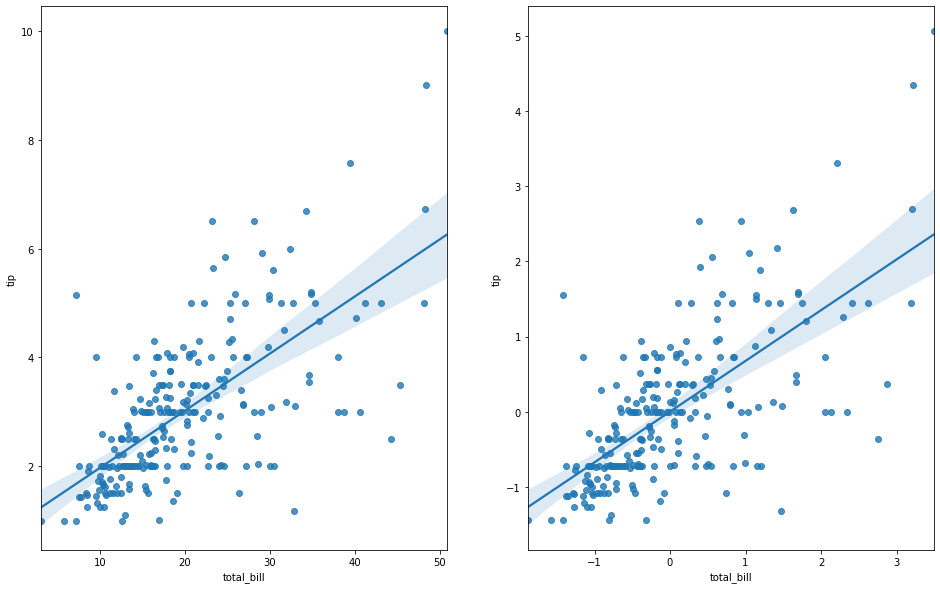

In [11]:
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.regplot(x='total_bill', y='tip', data=df)

plt.subplot(122)
sns.regplot(x='total_bill', y='tip', data=std_df)

plt.show()

In [12]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [13]:
std_df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [14]:
sm_lm_std = OLS(std_df['tip'], sm.add_constant(std_df[['total_bill']]))
result_std = sm_lm_std.fit()
print(result_std.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           6.69e-34
Time:                        12:10:35   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.81e-16      0.047   5.93e-15      1.0

In [15]:
std_df.describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


In [16]:
r_pearson = std_df.corr()['tip'][0]
std_bill = std_df.describe()['total_bill'][2]
std_tip = std_df.describe()['tip'][2]

r_pearson*(std_tip/std_bill)

0.6757341092113647

In [17]:
r = df.corr()['tip'][0]
bill = df.describe()['total_bill'][2]
tip = df.describe()['tip'][2]

r*(tip/bill)

0.10502451738435341

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [19]:
x = tips[['total_bill']] # predictor, dalam bentuk 2 dimensi / dataframe
y = tips['tip'] # target / dependent variable, dalam bentuk 1 dimensi / Series

# x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 101,test_size=0.25)
lr = LinearRegression()
lr.fit(x, y) # training the model

LinearRegression()

In [20]:
b1 = lr.coef_
b1

array([0.10502452])

In [21]:
b0 = lr.intercept_
b0

0.9202696135546731

In [22]:
lr.score(x,y) # R2 score

0.45661658635167657

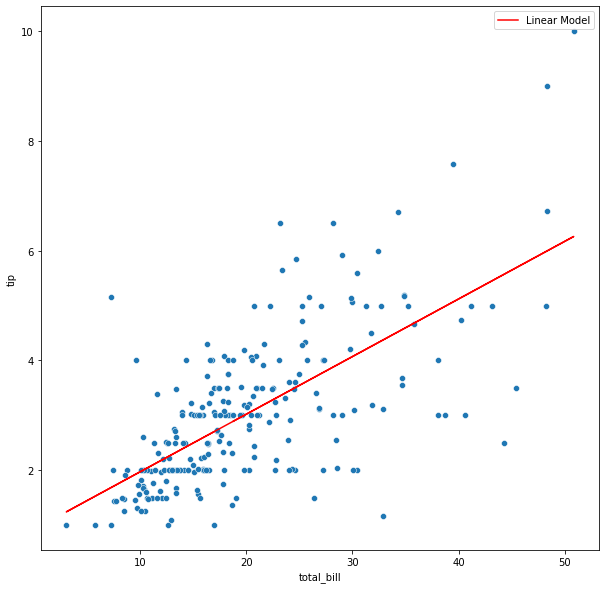

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], [b0+(b1*i) for i in tips['total_bill']], color='red', label='Linear Model')
plt.legend()
plt.show()

In [24]:
y_pred = lr.predict(x)
tips['prediction'] = y_pred
tips

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [25]:
mse = mean_squared_error(tips['tip'], tips['prediction'])
mse

1.036019442011377

In [26]:
rmse = np.sqrt(mse)
rmse

1.0178504025697377

In [27]:
tips['xi-mean'] = tips['total_bill'] - np.mean(tips['total_bill'])
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943


In [28]:
tips['(xi-mean)squared'] = tips['xi-mean']**2
tips

,total_bill,tip,sex,smoker,day,time,size,prediction,xi-mean,(xi-mean)squared
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057,23.078967
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057,85.452597
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057,54.672084
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057,8.317787
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943,3.864930


In [29]:
std_b1 = rmse / np.sqrt(np.sum(tips['(xi-mean)squared']))
std_b1

0.007334544177444975

In [30]:
t_stats = b1 / std_b1
t_stats

array([14.31916079])

## Coba hilangkan outliers (yang std_df tol bill & tips nya <-2 dan >2 itu outliers.) nnati coba hitung lagi r squared nya

In [31]:
naik = std_df.copy()

In [32]:
total_bill_outliers = naik[(naik['total_bill']<-2) | (naik['total_bill']>2)]
tip_outliers = naik[(naik['tip']<-2) | (naik['tip']>2)]

In [33]:
total_bill_outliers_list = list(total_bill_outliers.index)

In [34]:
tip_outliers_list = list(tip_outliers.index)

In [35]:
in_total_bill = set(total_bill_outliers_list)
in_tip = set(tip_outliers_list)

in_second_but_not_in_first = in_tip - in_total_bill

result = total_bill_outliers_list + list(in_second_but_not_in_first)
print(result)  # Prints [1, 2, 2, 5, 9, 7]

[23, 56, 59, 95, 102, 112, 142, 156, 170, 182, 184, 197, 207, 212, 141, 239, 47, 214, 183, 88]


In [36]:
# df.drop(df.index[[1,3]])
naik.drop(naik.index[result],inplace=True)

In [37]:
naik.describe()

,total_bill,tip
count,224.000000,224.000000
mean,-0.191222,-0.160183
std,0.759108,0.772709
min,-1.881547,-1.447189
25%,-0.761293,-0.722971
50%,-0.315837,-0.284819
75%,0.265817,0.352492
max,1.805919,1.920424


In [38]:
naik

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
238,1.805919,1.210690
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [39]:
sm_lm_std_drop_outliers = OLS(naik['tip'], sm.add_constant(naik[['total_bill']]))
result_naik = sm_lm_std_drop_outliers.fit()
print(result_naik.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.07e-24
Time:                        12:10:36   Log-Likelihood:                -207.42
No. Observations:                 224   AIC:                             418.8
Df Residuals:                     222   BIC:                             425.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0414      0.042     -0.979      0.3

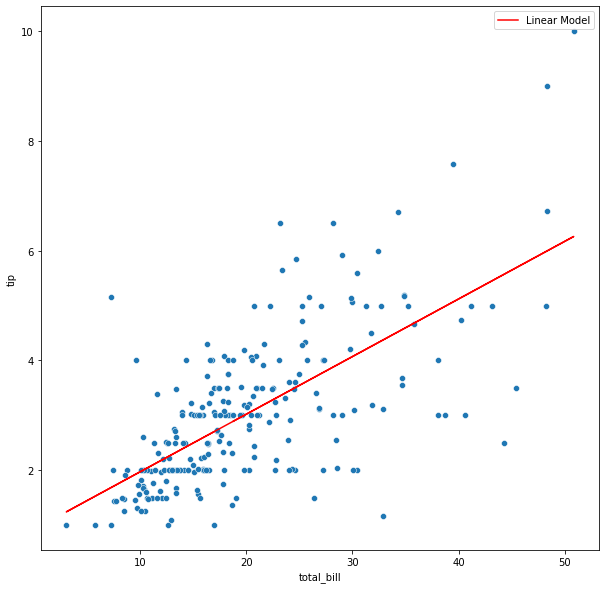

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], [b0+(b1*i) for i in tips['total_bill']], color='red', label='Linear Model')
plt.legend()
plt.show()

## __Pembuktian kalo std dari standar scale 1__

In [41]:
naik['tot_kuadrat']=naik['total_bill']**2
naik['tip_kuadrat']=naik['tip']**2
naik

,total_bill,tip,tot_kuadrat,tip_kuadrat
0,-0.314711,-1.439947,0.099043,2.073447
1,-1.063235,-0.969205,1.130469,0.939359
2,0.137780,0.363356,0.018983,0.132027
3,0.438315,0.225754,0.192120,0.050965
4,0.540745,0.443020,0.292405,0.196266
...,...,...,...,...
238,1.805919,1.210690,3.261344,1.465771
240,0.832275,-0.722971,0.692682,0.522687
241,0.324630,-0.722971,0.105384,0.522687
242,-0.221287,-0.904026,0.048968,0.817263


In [42]:
naik['tot_kuadrat'].sum()

136.6932044524168

In [43]:
naik['tip_kuadrat'].sum()

138.89630293418077

## __Pembuktian kalo std dari standar scale 1__

## __Multiple Linear Regression__

## Contoh dari Pak Ridho

In [44]:
df2 = tips[['size','total_bill','tip']]
df2

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [45]:
df2.describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


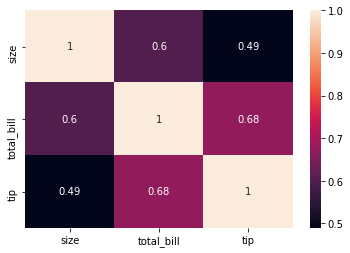

In [46]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

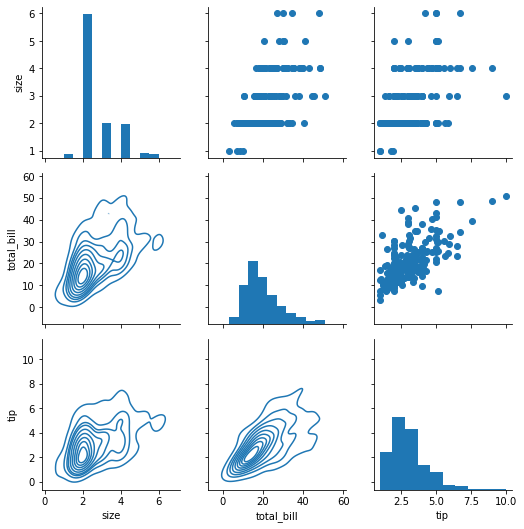

In [47]:
g = sns.PairGrid(df2)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

In [48]:
# lm_mr = OLS(df2['tip'],sm.add_constant(df2[['total_bill','size']]))
X = df2['tip']
Y = df2[['total_bill','size']]
lm_mr = OLS(X,sm.add_constant(Y))
result_mr = lm_mr.fit()

In [49]:
print(result_mr.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           9.67e-34
Time:                        12:10:38   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

## __Interpretation__

F-Test:
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6) 
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable

Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)

In [50]:
mr = LinearRegression()
mr.fit(Y,X)
print('Slope :',mr.coef_)
print('Intercept :',mr.intercept_)
print('R2 :',mr.score(Y,X))

Slope : [0.09271334 0.19259779]
Intercept : 0.6689447408125022
R2 : 0.46786930879612587


In [51]:
# meja 01 --> ada 3 customer, total bill 45 dollar. Prediksi berapa tips ?
mr.predict([[45,3]])

array([5.41883828])

In [52]:
df2['prediction'] = mr.predict(Y)
df2['prediksi']=mr.predict(df2[['total_bill','size']])
df2

<ipython-input-52-442964380cac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prediction'] = mr.predict(Y)
<ipython-input-52-442964380cac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prediksi']=mr.predict(df2[['total_bill','size']])


,size,total_bill,tip,prediction,prediksi
0,2,16.99,1.01,2.629340,2.629340
1,3,10.34,1.66,2.205394,2.205394
2,3,21.01,3.50,3.194645,3.194645
3,2,23.68,3.31,3.249592,3.249592
4,4,24.59,3.61,3.719157,3.719157
...,...,...,...,...,...
239,3,29.03,5.92,3.938206,3.938206
240,2,27.18,2.00,3.574089,3.574089
241,2,22.67,2.00,3.155952,3.155952
242,2,17.82,1.75,2.706292,2.706292


In [53]:
mse_mr = mean_squared_error(df2['tip'],df2['prediction'])
rmse_mr = np.sqrt(mse_mr)
print('MSE :', mse_mr)
print('RMSE :', rmse_mr)

MSE : 1.014564905610028
RMSE : 1.007256127114662


## Soal Latihan (Buat Sendiri)

Analyze tips data from seaborn

- Total Bill and Size as Independent Variable

- Tips as Dependent Variable

Analyze Multiple Linear Regression

Perform F Test and T Test

Interpret the result

* Use alpha 5%

In [54]:
multi = tips[['total_bill','size','tip']]
multi

,total_bill,size,tip
0,16.99,2,1.01
1,10.34,3,1.66
2,21.01,3,3.50
3,23.68,2,3.31
4,24.59,4,3.61
...,...,...,...
239,29.03,3,5.92
240,27.18,2,2.00
241,22.67,2,2.00
242,17.82,2,1.75


In [55]:
multi.corr()

,total_bill,size,tip
total_bill,1.000000,0.598315,0.675734
size,0.598315,1.000000,0.489299
tip,0.675734,0.489299,1.000000


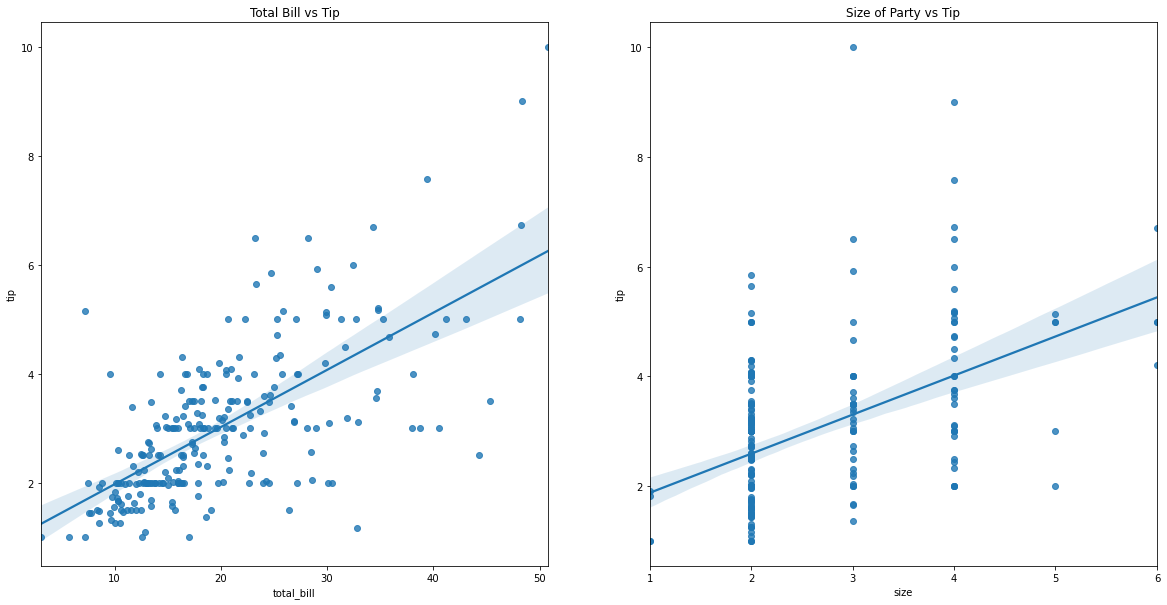

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Total Bill vs Tip')
sns.regplot(x='total_bill',y='tip',data=multi)

plt.subplot(1,2,2)
plt.title('Size of Party vs Tip')
sns.regplot(x='size',y='tip',data=multi)

plt.show()

In [57]:
multi_li = OLS(multi['tip'], sm.add_constant(multi[['total_bill','size']]))
result_multi = multi_li.fit()
print(result_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           9.67e-34
Time:                        12:10:39   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

<img src = '24.png'>

## P value dari total bill & size < 0,05. Jadi H0 ditolak.
## Tidak semua value dari B adalah 0

In [58]:
x_std = std_df[['total_bill']]
y_std = std_df['tip']

lr_std=LinearRegression()
lr_std.fit(x_std,y_std)

LinearRegression()

In [59]:
lr_std.coef_

array([0.67573411])

In [60]:
lr_std.intercept_

3.371174017962645e-16

In [61]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [62]:
scaler = StandardScaler()
scaler.fit(tips[['total_bill']])

StandardScaler()

In [63]:
scaler_y = StandardScaler()
scaler_y.fit(tips[['tip']])

StandardScaler()

In [64]:
#misal mau prediksi tips dari bill 36.5
bill = 36.5
z = scaler.transform([[bill]])
tip = lr_std.predict(z)
tip

array([1.27128177])

In [65]:
scaler_y.inverse_transform(tip)

array([4.7536645])

# Best practice untuk scaling : Yang discaling hanya X nya saja. Y nya biarin.

- StandarScaling : mean = 0, std = 1

- MinMaxScaler = min = 0, max = 1

- RobustScaler = Robust terhadap outliers (untuk meminimalisir efek outliers)

- MaxAbsScaler

In [66]:
x_mul = multi[['total_bill','size']]
y_mul = multi['tip']

lr_multi=LinearRegression()
lr_multi.fit(x_mul,y_mul)

LinearRegression()

In [67]:
scaler = StandardScaler()
scaler.fit(tips[['total_bill','size']])

StandardScaler()

In [68]:
#misal mau prediksi tips dari bill 36.5
mul_bill = 45
mul_size = 3
z_mul = scaler.transform([[mul_bill,mul_size]])
tip_mul = lr_multi.predict(z_mul)
scaler_y.inverse_transform(tip_mul)

array([4.40585855])

## Python Exercise : Diagnostics and COllinearity

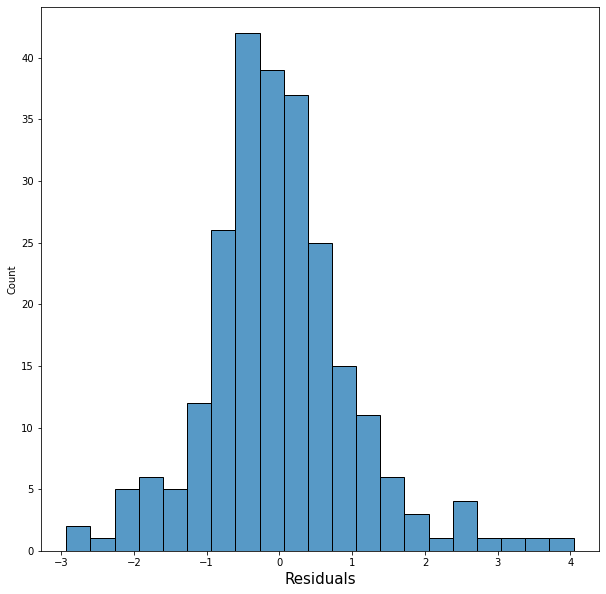

In [69]:
plt.figure(figsize=(10,10))
sns.histplot(result_mr.resid)
plt.xlabel('Residuals',fontsize=15)
plt.show()

### Ngecek dia standar normal distribusi apa engga

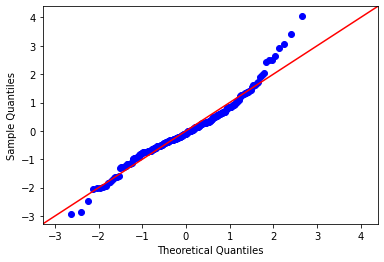

In [70]:
sm.qqplot(result_mr.resid,line='45')
plt.show()

### Gauss-Markov Assumption

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


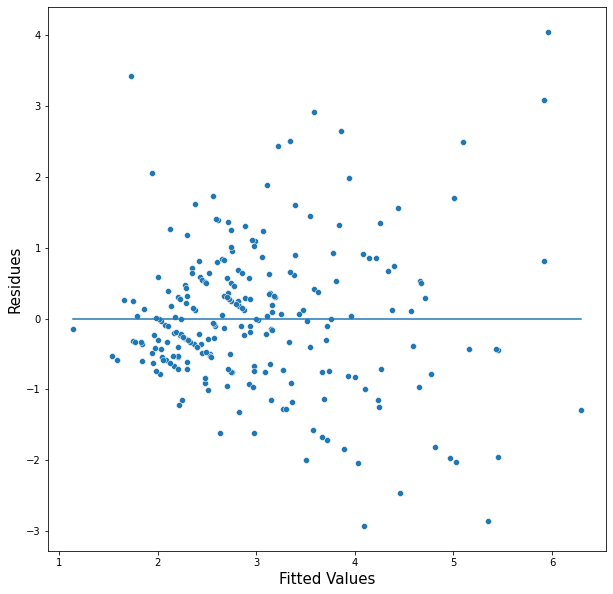

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot(result_mr.fittedvalues,result_mr.resid)
sns.lineplot(result_mr.fittedvalues,0)
plt.xlabel('Fitted Values',fontsize=15)
plt.ylabel('Residues',fontsize=15)
plt.show()

# Multicol

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['variabel']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [74]:
calc_vif(df2[['total_bill','size']])

,variabel,VIF
0,total_bill,8.684373
1,size,8.684373


Vif value is greater than 4. This means that it is multicol

Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Homoscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.


## Dummy Variable Preprocessing

In [75]:
tips.drop(['xi-mean','(xi-mean)squared','prediction'],axis=1,inplace=True)

In [76]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [77]:
tips_dummy = pd.get_dummies(tips,drop_first=True,columns=['sex','smoker','day','time'])

In [78]:
fitur = 'total_bill size sex_Female smoker_No day_Fri day_Sat day_Sun time_Dinner'.split()
fitur2 = 'total_bill size sex_Male sex_Female smoker_Yes smoker_No day_Thur day_Fri day_Sat day_Sun time_Dinner'.split()
target = 'tip'

lm_dum = OLS(tips_dummy[target],sm.add_constant(tips_dummy[fitur]))
result_dum = lm_dum.fit()
print(result_dum.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.20e-28
Time:                        12:10:40   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

Prob F-Stat <0.05 --> diterima

Tapi P |t| nya > 0.05 --> ditolak semua

## Assumption

we will asses some assumption and check the multicollinearity

1. Normality
1. Gauss-Markov
1. Multicollinearity

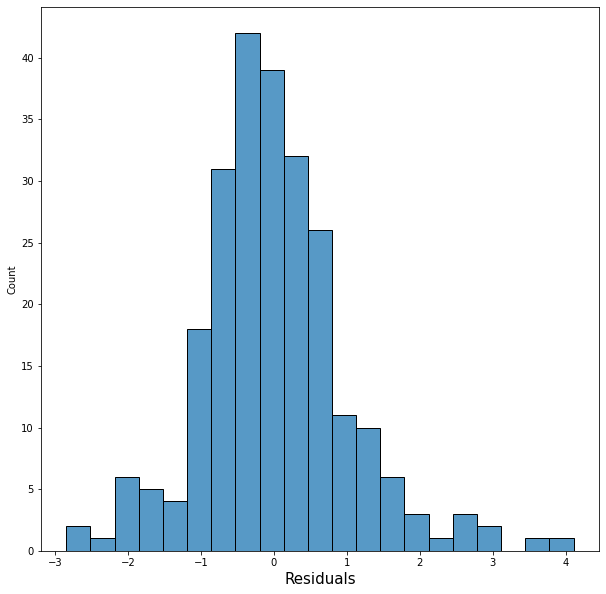

In [79]:
plt.figure(figsize=(10,10))
sns.histplot(result_dum.resid)
plt.xlabel('Residuals',fontsize=15)
plt.show()


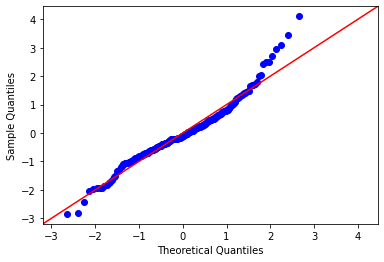

In [80]:
sm.qqplot(result_dum.resid,line='45')
plt.show()

C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


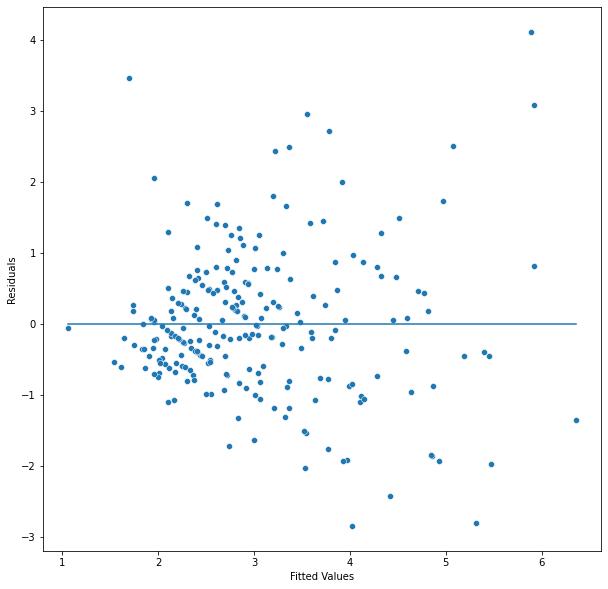

In [81]:
plt.figure(figsize=(10,10))
sns.scatterplot(result_dum.fittedvalues,result_dum.resid)
sns.lineplot(result_dum.fittedvalues,0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [82]:
calc_vif(tips_dummy[fitur])

,variabel,VIF
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Homoscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size. time dinner has the highest value of vif, it's reasonable if we exclude time dinner from model.


In [83]:
fitur3 = 'total_bill sex_Female smoker_No day_Fri day_Sat day_Sun time_Dinner'.split()
target = 'tip'
lm_dum2 = OLS(tips_dummy[target],sm.add_constant(tips_dummy[fitur3]))
result_dum2 = lm_dum2.fit()
print(result_dum2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     28.88
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.37e-28
Time:                        12:10:40   Log-Likelihood:                -349.47
No. Observations:                 244   AIC:                             714.9
Df Residuals:                     236   BIC:                             742.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7782      0.239      3.258      

In [84]:
calc_vif(tips_dummy[fitur3])

,variabel,VIF
0,total_bill,3.700898
1,sex_Female,1.440309
2,smoker_No,2.231585
3,day_Fri,2.507072
4,day_Sat,17.371850
5,day_Sun,15.400122
6,time_Dinner,32.893791


## Tujuan Awal Penelitian :

1. Untuk Prediksi :
    - Multicol bukan masalah besar
    - R2 yang paling tinggi, RMSE yang paling kecil

1. Analisa relationship :
    - Multicol diperhatikan
    - R2 sinyal
    - Homogenitas diperhatikan

In [85]:
fitur3

['total_bill',
 'sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner']

In [86]:
lr_dm = LinearRegression()
X = tips_dummy[fitur3]
Y = tips_dummy[target]

# misal 35.3 bill, male, non smoker, hari jumat
lr_dm.fit(X,Y)
lr_dm.predict([[35.3,0,1,1,0,0,1]])

array([4.70245997])

# Materi Selanjutnya : Klasifikasi

## Logistic Regression

## KNN

## Decision Tree

In [87]:
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


## Cobain no first_drop

In [88]:
tips_dummy_nofirstdrop = pd.get_dummies(tips,columns=['sex','smoker','day','time'])
tips_dummy_nofirstdrop

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [89]:
tips_dummy_nofirstdrop[['day_Thur','day_Fri','day_Sat','day_Sun']].corr()

,day_Thur,day_Fri,day_Sat,day_Sun
day_Thur,1.000000,-0.169608,-0.434480,-0.392566
day_Fri,-0.169608,1.000000,-0.216319,-0.195451
day_Sat,-0.434480,-0.216319,1.000000,-0.500682
day_Sun,-0.392566,-0.195451,-0.500682,1.000000


### Yang di drop yang paling gede korelasinya untuk menghindari multicollinearity. Jadi yang di drop Sunday

In [90]:
tips_dummy_nofirstdrop.drop(columns=['sex_Female','smoker_No','day_Sun','time_Dinner'],inplace=True)

In [91]:
tips_dummy_nofirstdrop

,total_bill,tip,size,sex_Male,smoker_Yes,day_Thur,day_Fri,day_Sat,time_Lunch
0,16.99,1.01,2,0,0,0,0,0,0
1,10.34,1.66,3,1,0,0,0,0,0
2,21.01,3.50,3,1,0,0,0,0,0
3,23.68,3.31,2,1,0,0,0,0,0
4,24.59,3.61,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,0,1,0
240,27.18,2.00,2,0,1,0,0,1,0
241,22.67,2.00,2,1,1,0,0,1,0
242,17.82,1.75,2,1,0,0,0,1,0


In [92]:
fitur4 = 'total_bill size sex_Male smoker_Yes day_Thur day_Fri day_Sat time_Lunch'.split()
target = 'tip'
lm_dum4 = OLS(tips_dummy_nofirstdrop[target],sm.add_constant(tips_dummy_nofirstdrop[fitur4]))
result_dum4 = lm_dum4.fit()
print(result_dum4.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.20e-28
Time:                        12:10:40   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7783      0.260      2.992      0.0

In [93]:
fitur4

['total_bill',
 'size',
 'sex_Male',
 'smoker_Yes',
 'day_Thur',
 'day_Fri',
 'day_Sat',
 'time_Lunch']

In [94]:
lr_dm = LinearRegression()
X = tips_dummy_nofirstdrop[fitur4]
Y = tips_dummy_nofirstdrop[target]


### Misal :

1. Tentukan tip yang diberi sama orang yang :

    - Total Bill = $40
    - Size of Party = 4
    - Male
    - Smoker
    - Makan hari Sabtu
    - Jam Makan Malam
    

In [95]:

# misal 35.3 bill, male, non smoker, hari jumat
lr_dm.fit(X,Y)
lr_dm.predict([[40,4,1,1,0,0,1,0]])

array([5.0469579])